# Import

In [1]:
# importing the sidmhalo package
import sidmhalo

# importing simulation data 
import simulations as sim

# tools for plotting
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

import inspect
import os 

import warnings
warnings.filterwarnings("ignore")

# Generating Dark Matter Halos

## CDM Halos

The sidmhalo package generates a CDM for the spherical or nonspherical cases. Below are examples of how to generate (i) a spherical CDM halo, and (ii) a nonspherical CDM halo with constant halo shape and (iii) a nonspherical CDM halo with radially-dependent shape.

In [2]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless
Phi_b = None # baryon potential, Msun/kpc^2

# Spherical CDM profile
spherical_cdm_profile = sidmhalo.gen.cdm(M200, c, q0=q_sph, Phi_b=Phi_b)

if spherical_cdm_profile:
    print("Spherical CDM profile generated successfully.")
else:
    print("Failed to generate spherical CDM profile.")

q_nsph = 0.8

# Nonspherical CDM profile with constant axis ratio
nonspherical_cdm_profile = sidmhalo.gen.cdm(M200, c, q0=q_nsph, Phi_b=Phi_b)

if nonspherical_cdm_profile:
    print("Nonspherical CDM profile generated successfully.")
else:
    print("Failed to generate nonspherical CDM profile.")

# alpha = 0.3
# q_func = lambda r: q_nsph * (r / R200)**alpha

# # Nonspherical CDM profile with non-constant axis ratio
# nonspherical_cdm_profile_nc = sidmhalo.gen.cdm(M200, c, q=q_func, Phi_b=Phi_b)

# if nonspherical_cdm_profile_nc:
#     print("Nonspherical CDM profile with non-constant axis ratio generated successfully.")
# else:
#     print("Failed to generate nonspherical CDM profile with non-constant axis ratio.")


Spherical CDM profile generated successfully.
Nonspherical CDM profile generated successfully.


Plotting the results for CDM-only halos

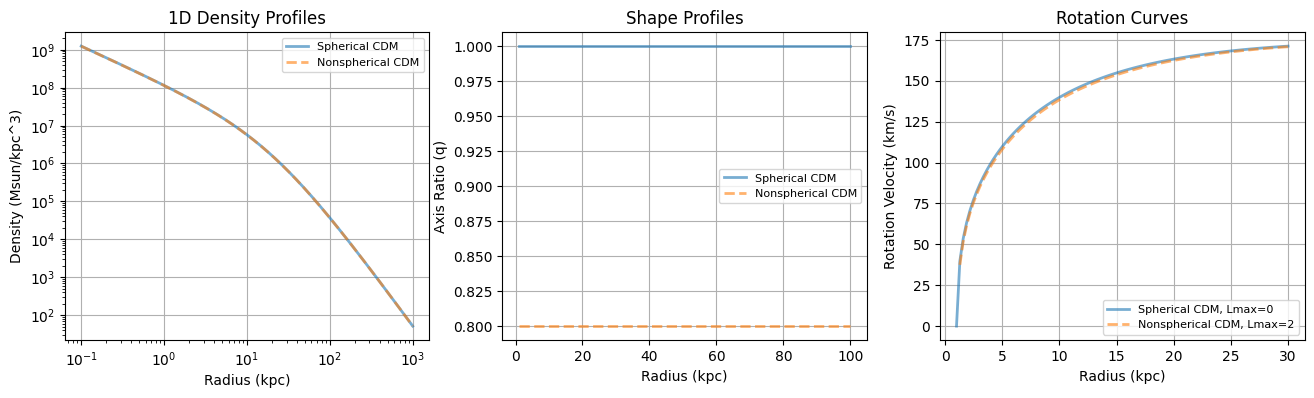

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, spherical_cdm_profile.rho_sph_avg(r), label='Spherical CDM', alpha=0.6, ls='-', lw=2)
axs[0].loglog(r, nonspherical_cdm_profile.rho_sph_avg(r), label='Nonspherical CDM', alpha=0.6, ls='--', lw=2)
# axs[0].loglog(r, nonspherical_cdm_profile_nc.rho_sph_avg(r), label='Nonspherical CDM (nc)', alpha=0.6, ls=':', lw=2)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, spherical_cdm_profile.q_eff(r), label='Spherical CDM', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, nonspherical_cdm_profile.q_eff(r), label='Nonspherical CDM', alpha=0.6, ls='--', lw=2)
# axs[1].plot(r, nonspherical_cdm_profile_nc.q_eff(r), label='Nonspherical CDM (nc)', alpha=0.6, ls=':', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, spherical_cdm_profile.V(r, Lmax=0), label='Spherical CDM, Lmax=0', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, nonspherical_cdm_profile.V(r, Lmax=2), label='Nonspherical CDM, Lmax=2', alpha=0.6, ls='--', lw=2)
# axs[2].plot(r, nonspherical_cdm_profile_nc.V(r, Lmax=2), label='Nonspherical CDM (nc), Lmax=2', alpha=0.6, ls=':', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()


Problems:
1. non-constant cdm shape not taking effect 
2. non-constant rotation curve produces error

## SIDM Halos 

In [4]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless
Phi_b = None # baryon potential, Msun/kpc^2
rm = 30

spherical_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=Phi_b)

if spherical_sidm_profile:
    print("Spherical SIDM profile generated successfully.")
else:
    print("Failed to generate spherical SIDM profile.")

q_nsph = 0.8

nonspherical_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_nsph, Phi_b=Phi_b)

if nonspherical_sidm_profile:
    print("Nonspherical SIDM profile generated successfully.")
else:
    print("Failed to generate nonspherical SIDM profile.")

alpha = 0.3
q_func = lambda r: q_nsph * (r / R200)**alpha

nonspherical_sidm_profile_nc = sidmhalo.gen.squashed(rm, M200, c, q=q_func, Phi_b=Phi_b)

if nonspherical_sidm_profile_nc:
    print("Nonspherical SIDM profile with non-constant axis ratio generated successfully.")
else:
    print("Failed to generate nonspherical SIDM profile with non-constant axis ratio.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.294 seconds.
Spherical SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.237 seconds.
Nonspherical SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.410 seconds.
Nonspherical SIDM profile with non-constant axis ratio generated successfully.


[Vsq_LM] WARNING: ODE solver did not return value for r=30.0. Filling with np.nan.


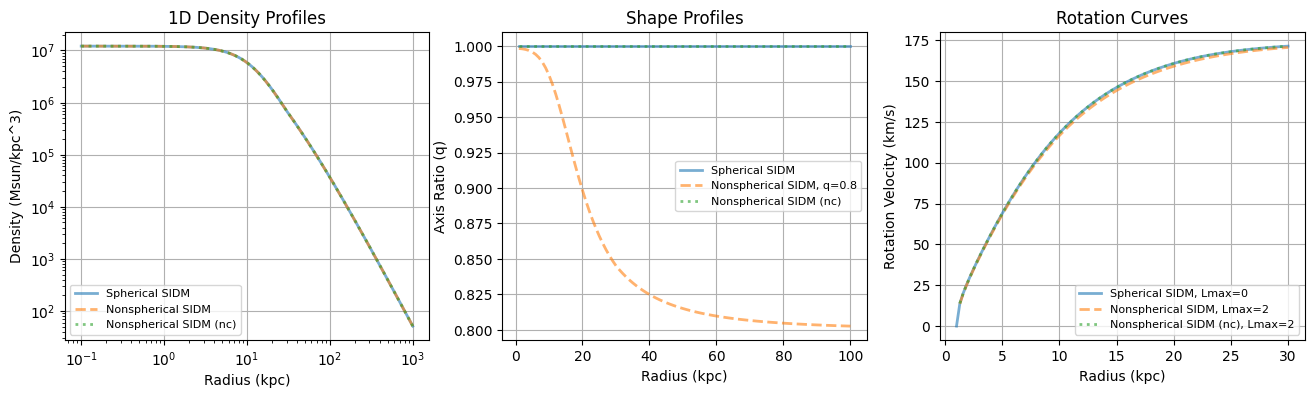

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, spherical_sidm_profile.rho_sph_avg(r), label='Spherical SIDM', alpha=0.6, ls='-', lw=2)
axs[0].loglog(r, nonspherical_sidm_profile.rho_sph_avg(r), label='Nonspherical SIDM', alpha=0.6, ls='--', lw=2)
axs[0].loglog(r, nonspherical_sidm_profile_nc.rho_sph_avg(r), label='Nonspherical SIDM (nc)', alpha=0.6, ls=':', lw=2)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, spherical_sidm_profile.q(r), label='Spherical SIDM', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, nonspherical_sidm_profile.q(r), label=f'Nonspherical SIDM, q={q_nsph}', alpha=0.6, ls='--', lw=2)
axs[1].plot(r, nonspherical_sidm_profile_nc.q(r), label='Nonspherical SIDM (nc)', alpha=0.6, ls=':', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, spherical_sidm_profile.V(r, Lmax=0), label='Spherical SIDM, Lmax=0', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, nonspherical_sidm_profile.V(r, Lmax=2), label='Nonspherical SIDM, Lmax=2', alpha=0.6, ls='--', lw=2)
axs[2].plot(r, nonspherical_sidm_profile_nc.V(r, Lmax=2), label='Nonspherical SIDM (nc), Lmax=2', alpha=0.6, ls=':', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

## SIDM + Baryon Halos

Note: Baryon potential must be function of two variables (r, th). If one wants to try a spherical baryon potential it can be inputted as:

'''python

Phi_b_sph = ...

Phi_b_wrapped = lambda r, th: Phi_b_sph(r)

'''

In [6]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless
rm = 30
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

spherical_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=Phi_b)

if spherical_sidm_profile:
    print("Spherical SIDM profile generated successfully.")
else:
    print("Failed to generate spherical SIDM profile.")

q_nsph = 0.8

nonspherical_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_nsph, Phi_b=Phi_b)

if nonspherical_sidm_profile:
    print("Nonspherical SIDM profile generated successfully.")
else:
    print("Failed to generate nonspherical SIDM profile.")

# alpha = 0.3
# q_func = lambda r: q_nsph * (r / R200)**alpha

# nonspherical_sidm_profile_nc = sidmhalo.gen.squashed(rm, M200, c, q=q_func, Phi_b=Phi_b)

# if nonspherical_sidm_profile_nc:
#     print("Nonspherical SIDM profile with non-constant axis ratio generated successfully.")
# else:
#     print("Failed to generate nonspherical SIDM profile with non-constant axis ratio.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.961 seconds.
Spherical SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.952 seconds.
Nonspherical SIDM profile generated successfully.


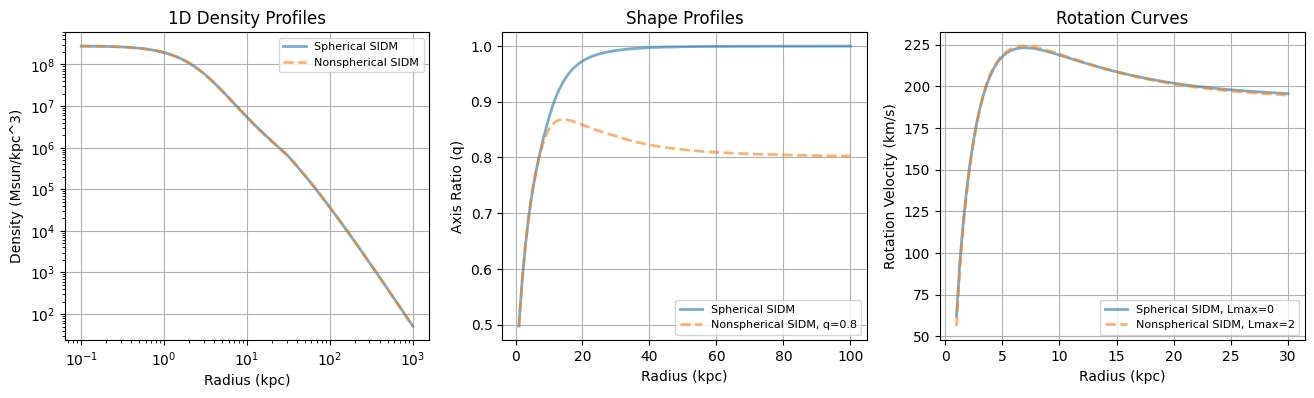

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, spherical_sidm_profile.rho_sph_avg(r), label='Spherical SIDM', alpha=0.6, ls='-', lw=2)
axs[0].loglog(r, nonspherical_sidm_profile.rho_sph_avg(r), label='Nonspherical SIDM', alpha=0.6, ls='--', lw=2)
# axs[0].loglog(r, nonspherical_sidm_profile_nc.rho_sph_avg(r), label='Nonspherical SIDM (nc)', alpha=0.6, ls=':', lw=2)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, spherical_sidm_profile.q(r), label='Spherical SIDM', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, nonspherical_sidm_profile.q(r), label=f'Nonspherical SIDM, q={q_nsph}', alpha=0.6, ls='--', lw=2)
# axs[1].plot(r, nonspherical_sidm_profile_nc.q_eff(r), label='Nonspherical SIDM (nc)', alpha=0.6, ls=':', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, spherical_sidm_profile.V(r, Lmax=0), label='Spherical SIDM, Lmax=0', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, nonspherical_sidm_profile.V(r, Lmax=2), label='Nonspherical SIDM, Lmax=2', alpha=0.6, ls='--', lw=2)
# axs[2].plot(r, nonspherical_sidm_profile_nc.V(r, Lmax=2), label='Nonspherical SIDM (nc), Lmax=2', alpha=0.6, ls=':', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

## Adiabatic Contraction 

In [8]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 30
Phi_b = None # baryon potential, Msun/kpc^2

sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b)
if sidm_profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")

sidm_profile_ca = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **{'AC_prescription':'Cautun'})
if sidm_profile_ca:
    print("SIDM profile with adiabatic contraction generated successfully.")
else:
    print("Failed to generate SIDM profile with adiabatic contraction.")

sidm_profile_gn = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **{'AC_prescription':'Gnedin', 'Gnedin_params':(1.6, 0.8)})
if sidm_profile_gn:
    print("SIDM profile with Gnedin contraction generated successfully.")
else:
    print("Failed to generate SIDM profile with Gnedin contraction.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.613 seconds.
SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.477 seconds.
SIDM profile with adiabatic contraction generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.706 seconds.
SIDM profile with Gnedin contraction generated successfully.


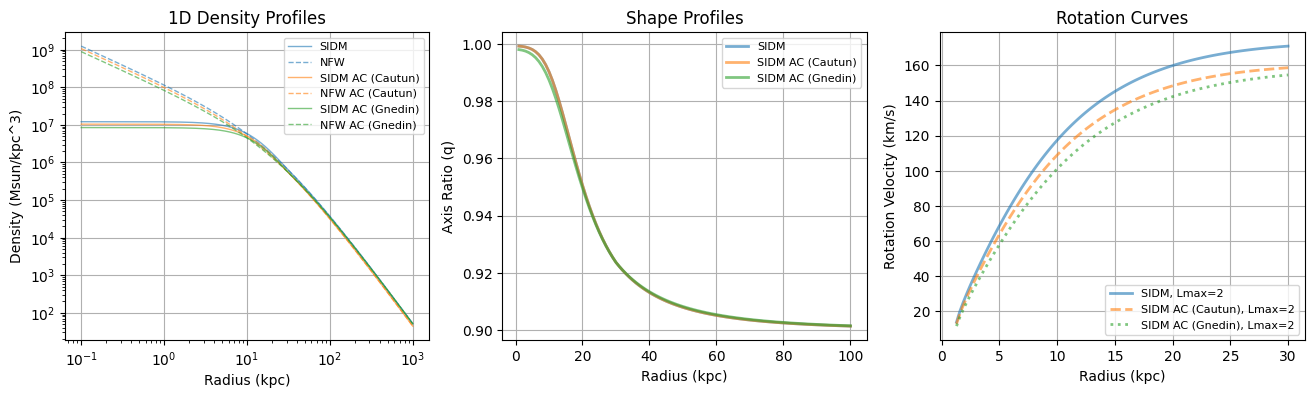

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, sidm_profile.rho_sph_avg(r), label='SIDM', c='C0', alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, sidm_profile.outer.rho_sph_avg(r), label='NFW',  c='C0', alpha=0.6, ls='--', lw=1)
axs[0].loglog(r, sidm_profile_ca.rho_sph_avg(r), label='SIDM AC (Cautun)', c='C1',  alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, sidm_profile_ca.outer.rho_sph_avg(r), label='NFW AC (Cautun)', c='C1', alpha=0.6, ls='--', lw=1)
axs[0].loglog(r, sidm_profile_gn.rho_sph_avg(r), label='SIDM AC (Gnedin)', c='C2', alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, sidm_profile_gn.outer.rho_sph_avg(r), label='NFW AC (Gnedin)', c='C2', alpha=0.6, ls='--', lw=1)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, sidm_profile.q(r), label='SIDM', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, sidm_profile_ca.q(r), label='SIDM AC (Cautun)', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, sidm_profile_gn.q(r), label='SIDM AC (Gnedin)', alpha=0.6, ls='-', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, sidm_profile.V(r, Lmax=2), label='SIDM, Lmax=2', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, sidm_profile_ca.V(r, Lmax=2), label='SIDM AC (Cautun), Lmax=2', alpha=0.6, ls='--', lw=2)
axs[2].plot(r, sidm_profile_gn.V(r, Lmax=2), label='SIDM AC (Gnedin), Lmax=2', alpha=0.6, ls=':', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

## Adiabatic Contraction + Baryons

In [10]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 10

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b)
if sidm_profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")

sidm_profile_ca = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **{'AC_prescription':'Cautun'})
if sidm_profile_ca:
    print("SIDM profile with adiabatic contraction generated successfully.")
else:
    print("Failed to generate SIDM profile with adiabatic contraction.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.749 seconds.
SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.574 seconds.
SIDM profile with adiabatic contraction generated successfully.


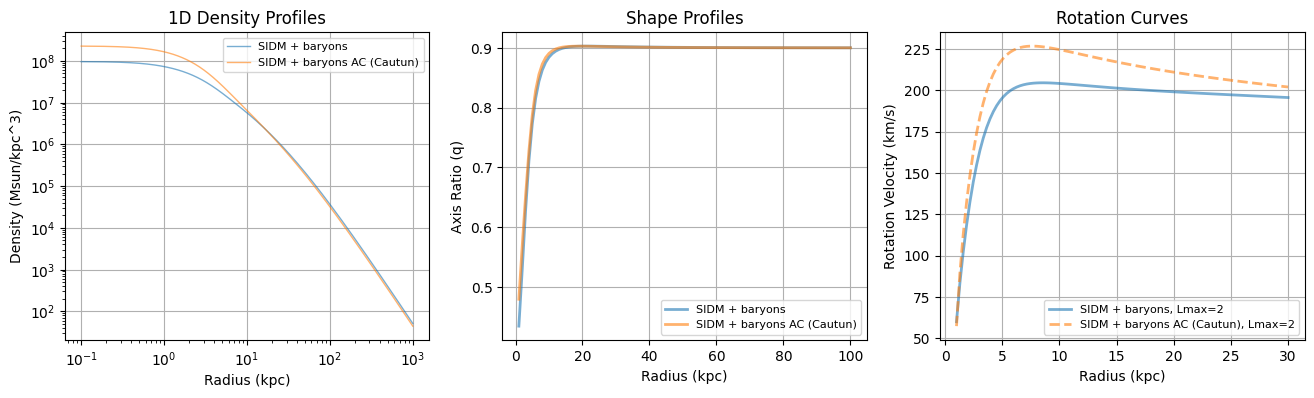

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, sidm_profile.rho_sph_avg(r), label='SIDM + baryons', c='C0', alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, sidm_profile_ca.rho_sph_avg(r), label='SIDM + baryons AC (Cautun)', c='C1',  alpha=0.6, ls='-', lw=1)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, sidm_profile.q(r), label='SIDM + baryons', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, sidm_profile_ca.q(r), label='SIDM + baryons AC (Cautun)', alpha=0.6, ls='-', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, sidm_profile.V(r, Lmax=2), label='SIDM + baryons, Lmax=2', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, sidm_profile_ca.V(r, Lmax=2), label='SIDM + baryons AC (Cautun), Lmax=2', alpha=0.6, ls='--', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

## Einasto Profile (in development)

In [12]:
M200 = 1e12 # virial mass, Msun
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 10
Phi_b = None # baryon potential, Msun/kpc^2
alpha = 0.2

nfw_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b)
if nfw_sidm_profile:
    print("NFW SIDM profile generated successfully.")
else:
    print("Failed to generate NFW SIDM profile.")

Einasto_sidm_profile = sidmhalo.gen.squashed(rm, M200, c, alpha, q0=q0, Phi_b=Phi_b)
if Einasto_sidm_profile:
    print("Einasto SIDM profile generated successfully.")
else:
    print("Failed to generate Einasto SIDM profile.")   

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.469 seconds.
NFW SIDM profile generated successfully.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.433 seconds.
Einasto SIDM profile generated successfully.


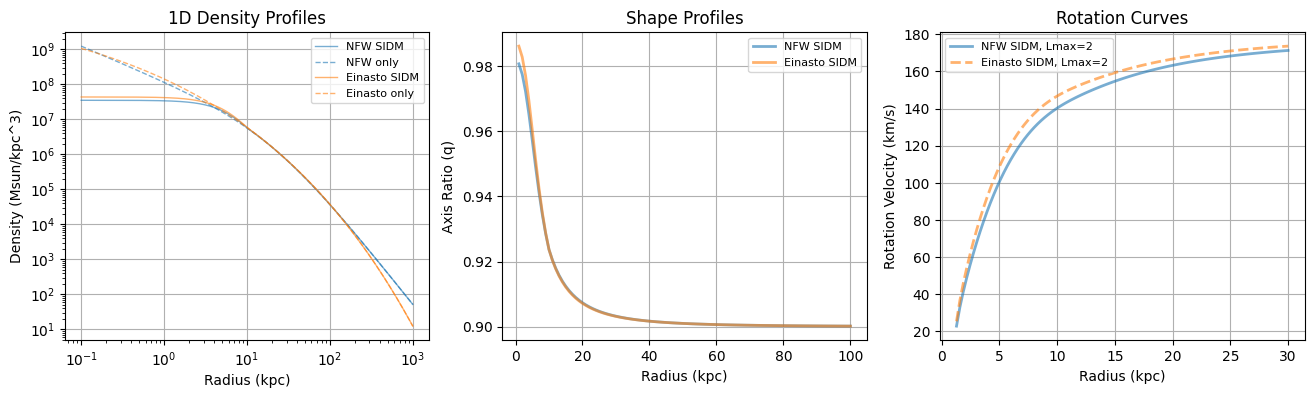

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, nfw_sidm_profile.rho_sph_avg(r), label='NFW SIDM', c='C0', alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, nfw_sidm_profile.outer.rho_sph_avg(r), label='NFW only',  c='C0', alpha=0.6, ls='--', lw=1)
axs[0].loglog(r, Einasto_sidm_profile.rho_sph_avg(r), label='Einasto SIDM', c='C1',  alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, Einasto_sidm_profile.outer.rho_sph_avg(r), label='Einasto only', c='C1', alpha=0.6, ls='--', lw=1)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, nfw_sidm_profile.q(r), label='NFW SIDM', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, Einasto_sidm_profile.q(r), label='Einasto SIDM', alpha=0.6, ls='-', lw=2)    
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, nfw_sidm_profile.V(r, Lmax=2), label='NFW SIDM, Lmax=2', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, Einasto_sidm_profile.V(r, Lmax=2), label='Einasto SIDM, Lmax=2', alpha=0.6, ls='--', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

# Profile Attributes and Methods

In [14]:
# Example profile
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 10
relaxation_kwarg = {'AC_prescription':'Cautun'}
# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **relaxation_kwarg)

if profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.554 seconds.
SIDM profile generated successfully.


## Profile Attributes 

The output profile is an instance of the class 'sidmhalo.classes.profile'.

An SIDM 'profile' class is a combination of isothermal_profile and CDM_profile accessed as attributes with .inner and .outer respectively. 

Below are the main attribues of the 'profile' class and the component inner and outer classed:

In [15]:
attributes = {}

print("Profile Attributes:")
attrs = []
for name, value in vars(profile).items():
    attrs.append(name)
    print(f"{name}: {value}")

attributes['profile'] = attrs

attrs = []
print("\nIsothermal_profile Attributes:")
for name, value in vars(profile.inner).items():
    if name == 'angular_moments_list':
        continue
    attrs.append(name)
    print(f"{name}: {value}")
    
attributes['Isothermal_profile'] = attrs

attrs = []
print("\nCDM_profile Attributes:")
for name, value in vars(profile.outer).items():
    attrs.append(name)
    print(f"{name}: {value}")
    
attributes['CDM_profile'] = attrs

Profile Attributes:
inner: <sidmhalo.classes.isothermal_profile object at 0x7ff94ebd67b0>
outer: <sidmhalo.classes.CDM_profile object at 0x7ff94d021160>
r1: 10.0
q: <function compute_q_eff.<locals>.q_eff at 0x7ff94ce9e660>
squash_flag: True
r_sph_interp: <function compute_r_sph_grid.<locals>.r_sph_interp at 0x7ff94c18efc0>
sph_sym_flag: False

Isothermal_profile Attributes:
num_func: 2
num_r_points: 201
y: [-1.16629095e-31  0.00000000e+00  3.04364832e-07  6.08729612e-10
  3.33883895e-07  6.99400477e-10  3.66265887e-07  8.03576854e-10
  4.01788472e-07  9.23270402e-10  4.40756241e-07  1.06079242e-09
  4.83503329e-07  1.21879847e-09  5.30396276e-07  1.40033966e-09
  5.81837171e-07  1.60892159e-09  6.38267099e-07  1.84857199e-09
  7.00169927e-07  2.12391854e-09  7.68076446e-07  2.44027821e-09
  8.42568929e-07  2.80375993e-09  9.24286120e-07  3.22138258e-09
  1.01392871e-06  3.70121049e-09  1.11226536e-06  4.25250918e-09
  1.22013925e-06  4.88592429e-09  1.33847537e-06  5.61368711e-09
  1.4

In [16]:
print(f'Profile attributes: {attributes['profile']}')
print(f'Isothermal_profile attributes: {attributes['Isothermal_profile']}')
print(f'CDM_profile attributes: {attributes['CDM_profile']}')

Profile attributes: ['inner', 'outer', 'r1', 'q', 'squash_flag', 'r_sph_interp', 'sph_sym_flag']
Isothermal_profile attributes: ['num_func', 'num_r_points', 'y', 'r_list', 'params', 'r0', 'sigma0', 'rho0', 'vrel', 'r1', 'L_list', 'M_list', 'Phi_b', '_Phi_b_user', 'num_Phi_b_variables', 'angular_moments_set', 'angular_moments_interp', 'sph_sym_flag']
CDM_profile attributes: ['M200', 'c', 'rhos', 'rs', 'r200', 'q0', 'sph_sym_flag', 'AC_prescription', 'Gnedin_params', 'Phi_b', '_Phi_b_user', 'M_b', 'rho_sph_sym', 'M_encl_sym']


In [17]:
# Example usage 

print(f'The matching radius is {profile.r1} kpc.')
print(f'r_0 and sigma_0 are {profile.inner.r0:.2f} kpc and {profile.inner.sigma0:.2f} km/s, respectively.')
print(f'The relative velocity is {profile.inner.vrel:.2f} km/s.')
print(f'M200 is {profile.outer.M200:.2e}.')
print(f'R200 is {profile.outer.r200:.2f} kpc.')
print(f'Concentration is {profile.outer.c:.2f}.')
print(f'Scale radius is {profile.outer.rs:.2f} kpc.')
print(f'Scale density is {profile.outer.rhos:.2e} Msun/kpc^3.')
print(f'q0 is {profile.outer.q0:.2f}.')
print(f'The AC prescription is {profile.outer.AC_prescription}.')

The matching radius is 10.0 kpc.
r_0 and sigma_0 are 1.39 kpc and 154.11 km/s, respectively.
The relative velocity is 347.80 km/s.
M200 is 1.00e+12.
R200 is 206.30 kpc.
Concentration is 10.00.
Scale radius is 20.63 kpc.
Scale density is 6.09e+06 Msun/kpc^3.
q0 is 1.00.
The AC prescription is Cautun.


NB: q0 should be the same as the input... Something is being overwritten here...

## Profile Methods

The profile object comes with a number of useful methods. In general you will not need to use methods associated with inner and outer, as they are subsumed by the profile class. 

In [18]:
for name, member in inspect.getmembers(profile, inspect.ismethod):
    if not name.startswith('_'):
        print(name)


M_encl
Phi
Phi_LM
Phi_dm
V
V_baryon
Vdm
Vsq
Vsq_LM
Vsq_baryon
Vsq_dm
Vsq_dm_sph_sym
cross_section
q_eff
q_encl
q_shell
r_sph
rho_LM
rho_LM_interp
rho_cyl
rho_cyl_array
rho_sph
rho_sph_avg
rho_spherical
save


In [19]:
# Example usage
print(f'The cross section is {profile.cross_section():.2f} cm^2/g.')
print(f'The mass enclosed is {profile.M_encl(10):.2e} Msun at 10 kpc.')
# print(f'The total potential at r,th = 10 kpc, pi/4 is {profile.Phi_LM(10, np.pi/4, 0):.2e}.') # Causes error 
print(f'The DM axial ratio at 10 kpc is {profile.q_eff(10):.2f}.')
print(f'The average spherical density at 8 kpc is {profile.rho_sph_avg(8):.2e} Msun/kpc^3.')


The cross section is 0.21 cm^2/g.
The mass enclosed is 6.65e+10 Msun at 10 kpc.
The DM axial ratio at 10 kpc is 0.89.
The average spherical density at 8 kpc is 1.02e+07 Msun/kpc^3.


# Saving and Loading Profiles

In [20]:
# Example profile
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 10
relaxation_kwarg = {'AC_prescription':'Cautun'}
# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **relaxation_kwarg)

if profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.543 seconds.
SIDM profile generated successfully.


In [21]:
# Saving a profile 
path = os.getcwd() + '/data/jeans_profiles/'
if not os.path.exists(path):
    os.makedirs(path)
filename = f'r1_{rm}_logM200_{np.log10(M200):.2f}_c_{c}_MNDisk_Cautun.npz'
profile.save(f'{path}{filename}')

In [22]:
from sidmhalo.classes import load_profile

In [23]:
# loading a profile 
loaded_profile = load_profile(f'{path}{filename}')
if loaded_profile:
    print("Profile loaded successfully.")
else:
    print("Failed to load profile.")

Profile loaded successfully.


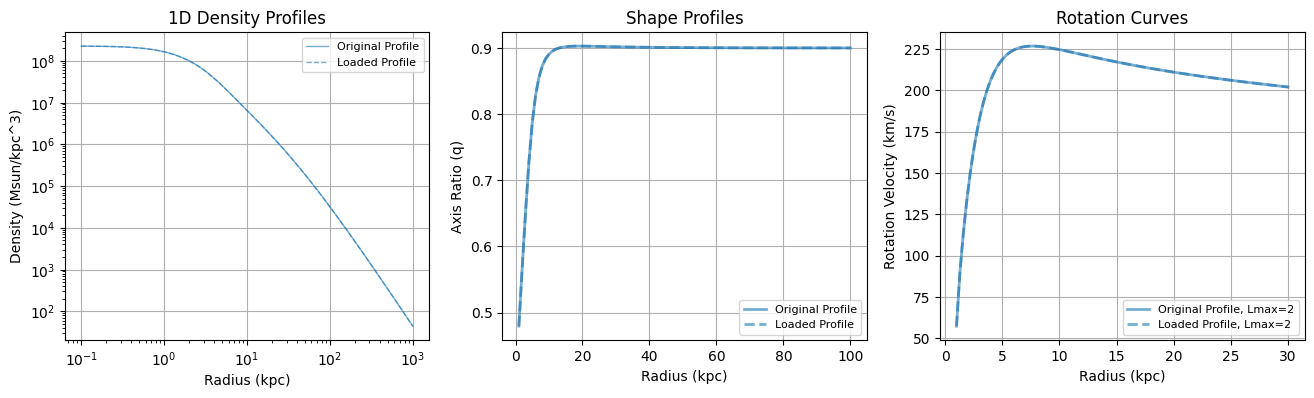

In [24]:
# compare the original and loaded profiles
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 1D density profile 
r = np.logspace(-1,3, num=1_000)
axs[0].loglog(r, profile.rho_sph_avg(r), label='Original Profile', c='C0', alpha=0.6, ls='-', lw=1)
axs[0].loglog(r, loaded_profile.rho_sph_avg(r), label='Loaded Profile',  c='C0', alpha=0.6, ls='--', lw=1)
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
r = np.linspace(1,100, num=100)
axs[1].plot(r, profile.q(r), label='Original Profile', c='C0', alpha=0.6, ls='-', lw=2)
axs[1].plot(r, loaded_profile.q(r), label='Loaded Profile', c='C0', alpha=0.6, ls='--', lw=2)
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].grid()

# Rotation curves
r = np.linspace(1,30,num=100)
axs[2].plot(r, profile.V(r, Lmax=2), label='Original Profile, Lmax=2', c='C0', alpha=0.6, ls='-', lw=2)
axs[2].plot(r, loaded_profile.V(r, Lmax=2), label='Loaded Profile, Lmax=2', c='C0', alpha=0.6, ls='--', lw=2)
axs[2].set_xlabel('Radius (kpc)')
axs[2].set_ylabel('Rotation Velocity (km/s)')
axs[2].set_title('Rotation Curves')
axs[2].legend(fontsize=8)
axs[2].grid()

# Visualizations

In [25]:
# Example profile
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.9 # spherical axis ratio, dimensionless
rm = 10
relaxation_kwarg = {'AC_prescription':'Cautun'}
# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **relaxation_kwarg)

if profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.786 seconds.
SIDM profile generated successfully.


## Spherically-averaged density profile

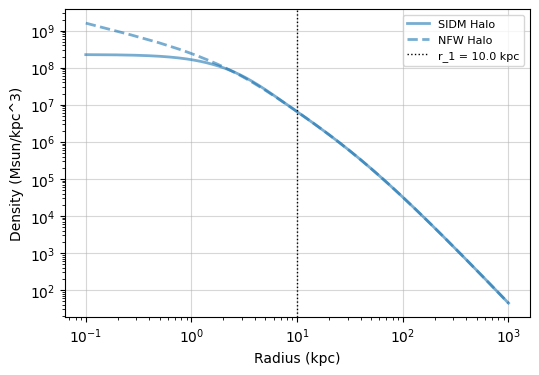

In [26]:
r = np.logspace(-1,3, num=1_000)

plt.figure(figsize=(6,4))
plt.loglog(r, profile.rho_sph_avg(r), label='SIDM Halo', c='C0', alpha=0.6, ls='-', lw=2)
plt.loglog(r, profile.outer.rho_sph_avg(r), label='NFW Halo',  c='C0', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()


## Shape profile

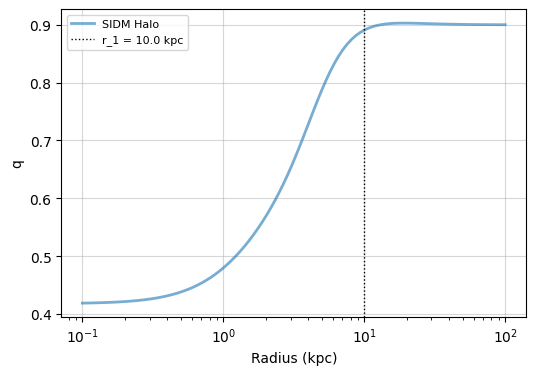

In [27]:
r = np.geomspace(0.1,100, num=100)

plt.figure(figsize=(6,4))
plt.plot(r, profile.q(r), label='SIDM Halo', c='C0', alpha=0.6, ls='-', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('q')
plt.xscale('log')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()

## Rotation Curve 

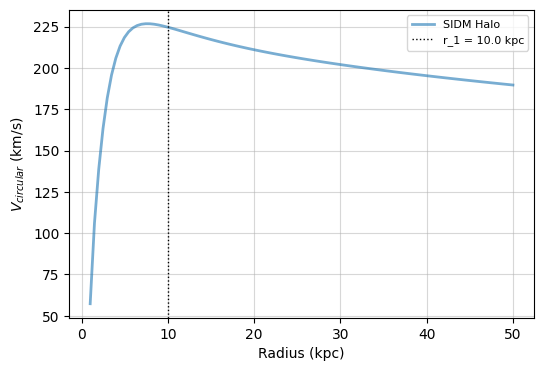

In [28]:
r = np.linspace(1,50, num=100)

plt.figure(figsize=(6,4))
plt.plot(r, profile.V(r, Lmax=2), label='SIDM Halo', c='C0', alpha=0.6, ls='-', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel(r'$V_{circular}$ (km/s)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()

## 2D Density Maps 

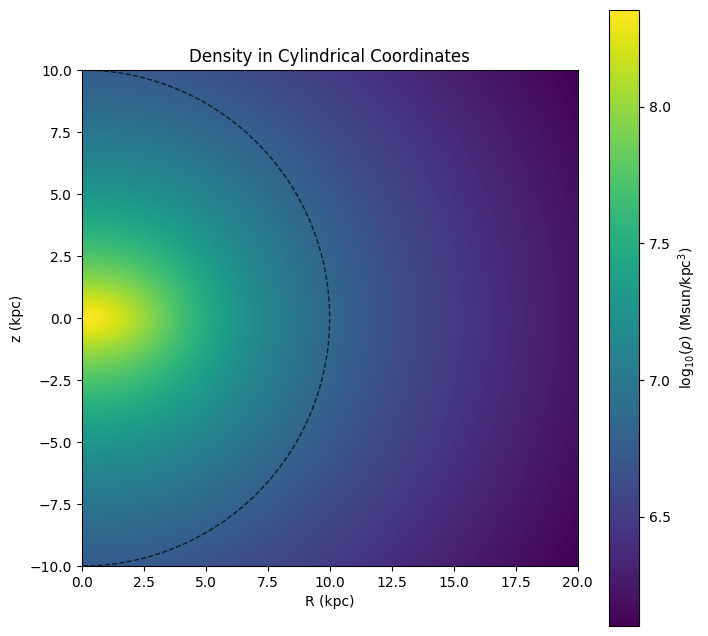

In [29]:
R_list = np.linspace(0, 20, num=200)
z_list = np.linspace(-10, 10, num=200)
R, Z = np.meshgrid(R_list, z_list, indexing='xy')
r_sph = np.sqrt(R**2 + Z**2)

rho_2D = profile.rho_cyl_array(R_list, z_list)

extent = [R_list.min(), R_list.max(), z_list.min(), z_list.max()]

plt.figure(figsize=(8,8))
plt.imshow(np.log10(rho_2D.T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
plt.contour(R, Z, r_sph, levels=[profile.r1], colors='k', linestyles='--', linewidths=1, alpha=0.7)
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.title('Density in Cylindrical Coordinates')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


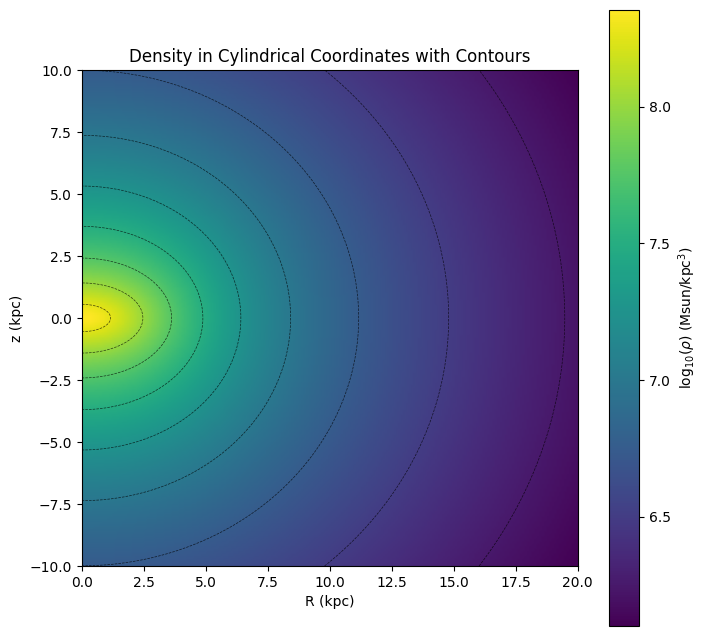

In [30]:
R_list = np.linspace(0, 20, num=200)
z_list = np.linspace(-10, 10, num=200)
R, Z = np.meshgrid(R_list, z_list, indexing='xy')

rho_2D = profile.rho_cyl_array(R_list, z_list)

extent = [R_list.min(), R_list.max(), z_list.min(), z_list.max()]

plt.figure(figsize=(8,8))
plt.imshow(np.log10(rho_2D.T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
plt.contour(R, Z, np.log10(rho_2D.T), levels=10, colors='k', linewidths=0.5, linestyles='--', alpha=0.7)
plt.xlabel('R (kpc)')
plt.ylabel('z (kpc)')
plt.title('Density in Cylindrical Coordinates with Contours')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Eagle-50 Simulation Data

In order to run the Jeans model with the EAGLE-50 simulation data please download the data from the link [https://zenodo.org/records/16331984] and add it to the folder </data/EAGLE-50-data>.

## Loading the data with simulations.py

In [31]:
# halo id from 1-250
halo_id = 0
# load either SIDM1b, CDMb, or vdSIDMb
# data_path = os.getcwd() + '/data/EAGLE-50-data/' # default path, set if different
sidm = sim.fit(halo_id, model='SIDM1b')
cdm = sim.fit(halo_id, model='CDMb')

In [32]:
# print out some halo properties
print(f"M200 for SIDM halo {halo_id} is {sidm.M200:.2e} Msun.")
print(f"M200 for CDM halo {halo_id} is {cdm.M200:.2e} Msun.")
print(f'R200 for SIDM halo {halo_id} is {sidm.R200:.2f} kpc.')
print(f'R200 for CDM halo {halo_id} is {cdm.R200:.2f} kpc.')

M200 for SIDM halo 0 is 7.41e+11 Msun.
M200 for CDM halo 0 is 7.11e+11 Msun.
R200 for SIDM halo 0 is 190.71 kpc.
R200 for CDM halo 0 is 188.15 kpc.


## Spherically Averaged Density Profile

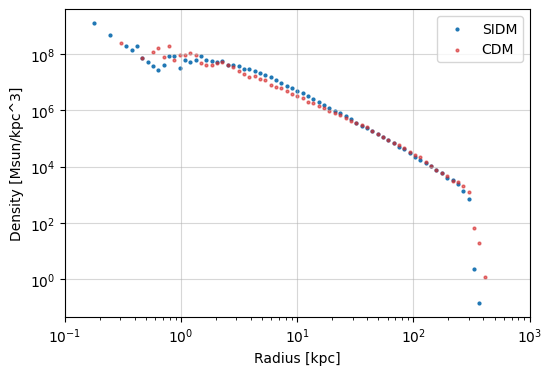

In [33]:
rho_dm_sidm = sidm.sph_avg_dm_density()
rho_dm_cdm = cdm.sph_avg_dm_density()
rho_baryon_sidm = sidm.sph_avg_baryon_density()
rho_baryon_cdm = cdm.sph_avg_baryon_density()

plt.figure(figsize=(6,4))
plt.scatter(rho_dm_sidm['r'], rho_dm_sidm['rho'], label='SIDM', c='C0', alpha=1.0, s=4)
plt.scatter(rho_dm_cdm['r'], rho_dm_cdm['rho'], label='CDM', c='C3', alpha=0.6, s=4)
# plt.scatter(rho_baryon_sidm['r'], rho_baryon_sidm['rho'], label='SIDM Baryons', c='C1', alpha=1.0, s=4)
# plt.scatter(rho_baryon_cdm['r'], rho_baryon_cdm['rho'], label='CDM Baryons', c='C1', alpha=0.6, s=4)
plt.xlabel('Radius [kpc]')
plt.ylabel('Density [Msun/kpc^3]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 1000)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()


## Shapes

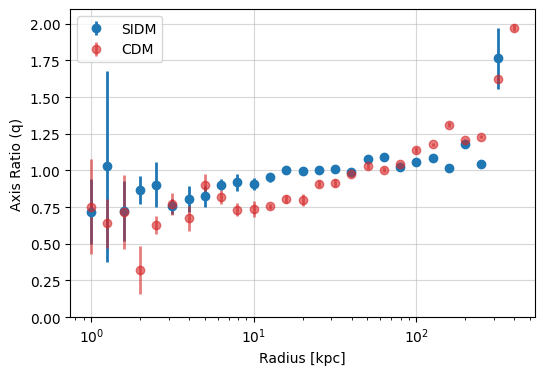

In [34]:
q_dm_sidm = sidm.q_dm()
q_dm_cdm = cdm.q_dm()

plt.figure(figsize=(6,4))
plt.errorbar(q_dm_sidm['r'], q_dm_sidm['q'], yerr=q_dm_sidm['error'], label='SIDM', c='C0', fmt='o', alpha=1.0, lw=2)
plt.errorbar(q_dm_cdm['r'], q_dm_cdm['q'], yerr=q_dm_cdm['error'], label='CDM', c='C3', fmt='o', alpha=0.6, lw=2)
plt.xlabel('Radius [kpc]')
plt.ylabel('Axis Ratio (q)')
plt.xscale('log')
plt.ylim(0, 2.1)
plt.legend()
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.show()

## 2D Density Maps

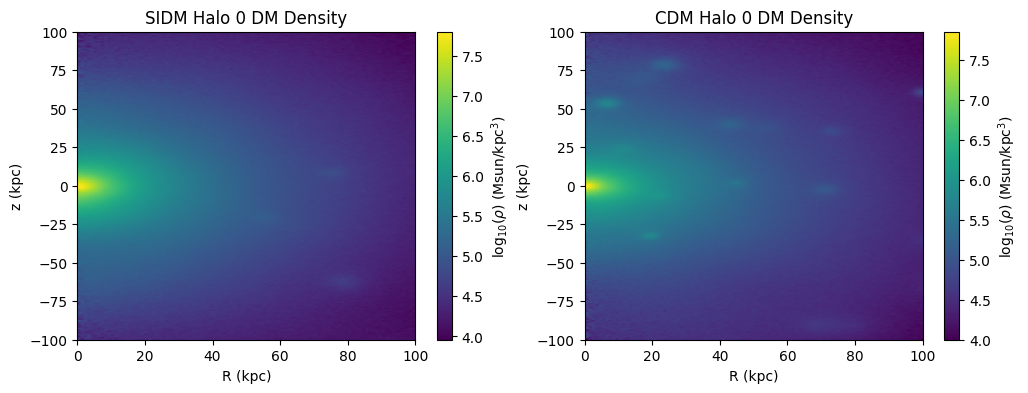

In [35]:
rho_2D_sidm = sidm.cyl_dm_density()
rho_2D_cdm = cdm.cyl_dm_density()

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# sidm density first 
extent = rho_2D_sidm['extent']
im1 = axs[0].imshow(np.log10(rho_2D_sidm['rho_2D'].T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
axs[0].set_xlabel('R (kpc)')
axs[0].set_ylabel('z (kpc)')
axs[0].set_title(f'SIDM Halo {halo_id} DM Density')

# cdm density second
extent = rho_2D_cdm['extent']
im2 = axs[1].imshow(np.log10(rho_2D_cdm['rho_2D'].T), origin='lower', extent=extent, aspect='auto', cmap='viridis')
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label(r'log$_{10}(\rho)$ (Msun/kpc$^3$)')
axs[1].set_xlabel('R (kpc)')
axs[1].set_ylabel('z (kpc)')
axs[1].set_title(f'CDM Halo {halo_id} DM Density')
plt.show()

## Generating an SIDM profile with Phi_b from the simulations

In [36]:
rm = 10 # matching radius in kpc
c = 10 # concentration parameter for NFW profile

# simulation inputs 
halo_id = 0
sidm = sim.fit(halo_id, model='SIDM1b')
Phi_b = sidm.Phi_b
print(inspect.signature(Phi_b))

M200 = sidm.M200
sidm_q = sidm.q_dm()
q_interp = interp1d(sidm_q['r'], sidm_q['q'], bounds_error=False, fill_value=(sidm_q['q'][0], sidm_q['q'][-1]))
q0 = q_interp(rm)
print(f'q0 at rm={rm} kpc is {q0:.2f}')

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q0, Phi_b=Phi_b, **{'AC_prescription':'Cautun'})

if profile:
    print("SIDM profile generated successfully.")
else:
    print("Failed to generate SIDM profile.")


(r, th)
q0 at rm=10 kpc is 0.91
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/sidmhalo/spherical.py) took 2.270 seconds.
SIDM profile generated successfully.


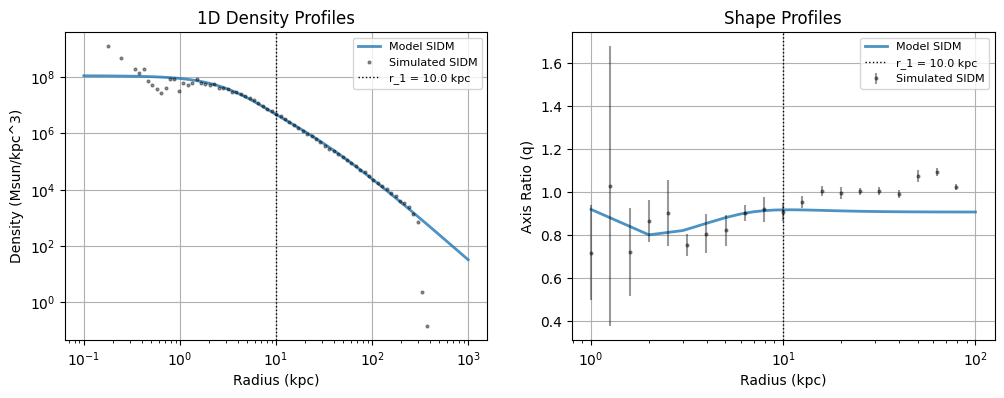

In [37]:
# compare the simulation and model profiles

rho_data = sidm.sph_avg_dm_density()
shape_data = sidm.q_dm()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# 1D density profile 
select = (rho_data['r'] > 0) & (rho_data['r'] < 1000)
r = np.logspace(-1,3, num=100)
axs[0].loglog(r, profile.rho_sph_avg(r), label='Model SIDM', c='C0', alpha=0.8, ls='-', lw=2)
axs[0].loglog(rho_data['r'][select], rho_data['rho'][select], label='Simulated SIDM', c='k', alpha=0.4, ls='', marker='o', markersize=2)
axs[0].axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
axs[0].set_xlabel('Radius (kpc)')
axs[0].set_ylabel('Density (Msun/kpc^3)')
axs[0].set_title('1D Density Profiles')
axs[0].legend(fontsize=8)
axs[0].grid()

# Shape profiles
select = (shape_data['r'] > 0) & (shape_data['r'] < 100)
r = np.linspace(1,100, num=100)
axs[1].plot(r, profile.q(r), label='Model SIDM', c='C0', alpha=0.8, ls='-', lw=2)
axs[1].errorbar(shape_data['r'][select], shape_data['q'][select], yerr=shape_data['error'][select], label='Simulated SIDM', c='k', fmt='o', alpha=0.4, markersize=2)
axs[1].axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
axs[1].set_xlabel('Radius (kpc)')
axs[1].set_ylabel('Axis Ratio (q)')
axs[1].set_title('Shape Profiles')
axs[1].legend(fontsize=8)
axs[1].set_xscale('log')
axs[1].grid()
plt.show()
